https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [15]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [16]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [9]:
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['week'] = le.fit_transform(df['week'])

In [19]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47
344,2016,12,28,6,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,0,48,48,45.4,57,44,46,44,42


In [20]:
df_mes = df.groupby('month')['temp_1'].mean().reset_index()
df_mes

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [21]:
df_merged = pd.merge(df,df_mes, on='month')
df_merged

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,0,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,2,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,3,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,1,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,5,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,6,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,4,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,0,48,48,45.4,57,44,46,44,42,43.741935


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

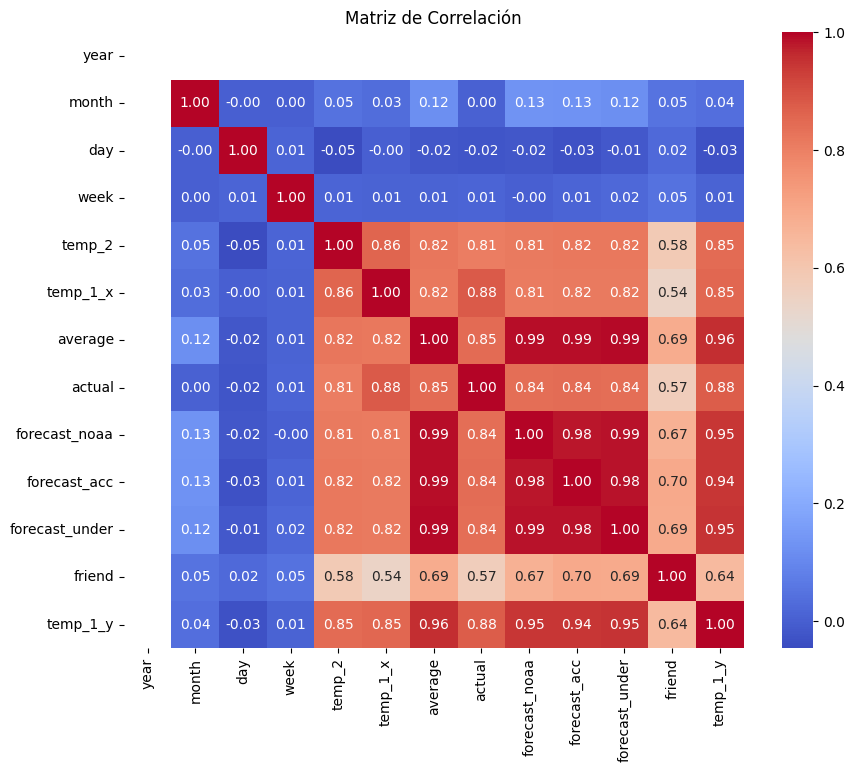

In [26]:
correlation_matrix = df_merged.corr()
# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

### 3. Divide en train y test

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X = df_merged.drop(columns=['actual'])  # Variables predictoras
y = df_merged['actual']  # Variable objetivo

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Entrena el modelo


In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [32]:
dtr.feature_importances_

array([0.        , 0.01441263, 0.0216293 , 0.01085578, 0.01737378,
       0.75992524, 0.10085391, 0.01184566, 0.01840351, 0.02767967,
       0.01461884, 0.00240168])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 


Calcula el MAE, MAPE, MSE y RMSE.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


# 1. Coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

# 2. MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# 3. MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 4. MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# 5. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)


print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}%")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")

Coeficiente de Determinación (R²): 0.7256
MAE (Mean Absolute Error): 4.5429
MAPE (Mean Absolute Percentage Error): 7.0776%
MSE (Mean Squared Error): 38.3714
RMSE (Root Mean Squared Error): 6.1945


In [35]:
y_pred

array([79., 61., 52., 62., 72., 63., 71., 71., 68., 81., 61., 67., 40.,
       60., 68., 57., 58., 56., 55., 79., 63., 57., 71., 55., 64., 49.,
       66., 50., 59., 77., 71., 64., 56., 90., 73., 60., 51., 54., 67.,
       48., 77., 59., 81., 41., 63., 82., 56., 85., 51., 41., 45., 42.,
       64., 64., 71., 60., 55., 64., 51., 59., 60., 49., 57., 71., 61.,
       57., 76., 67., 83., 42.])

### 6. Representa el árbol de decision

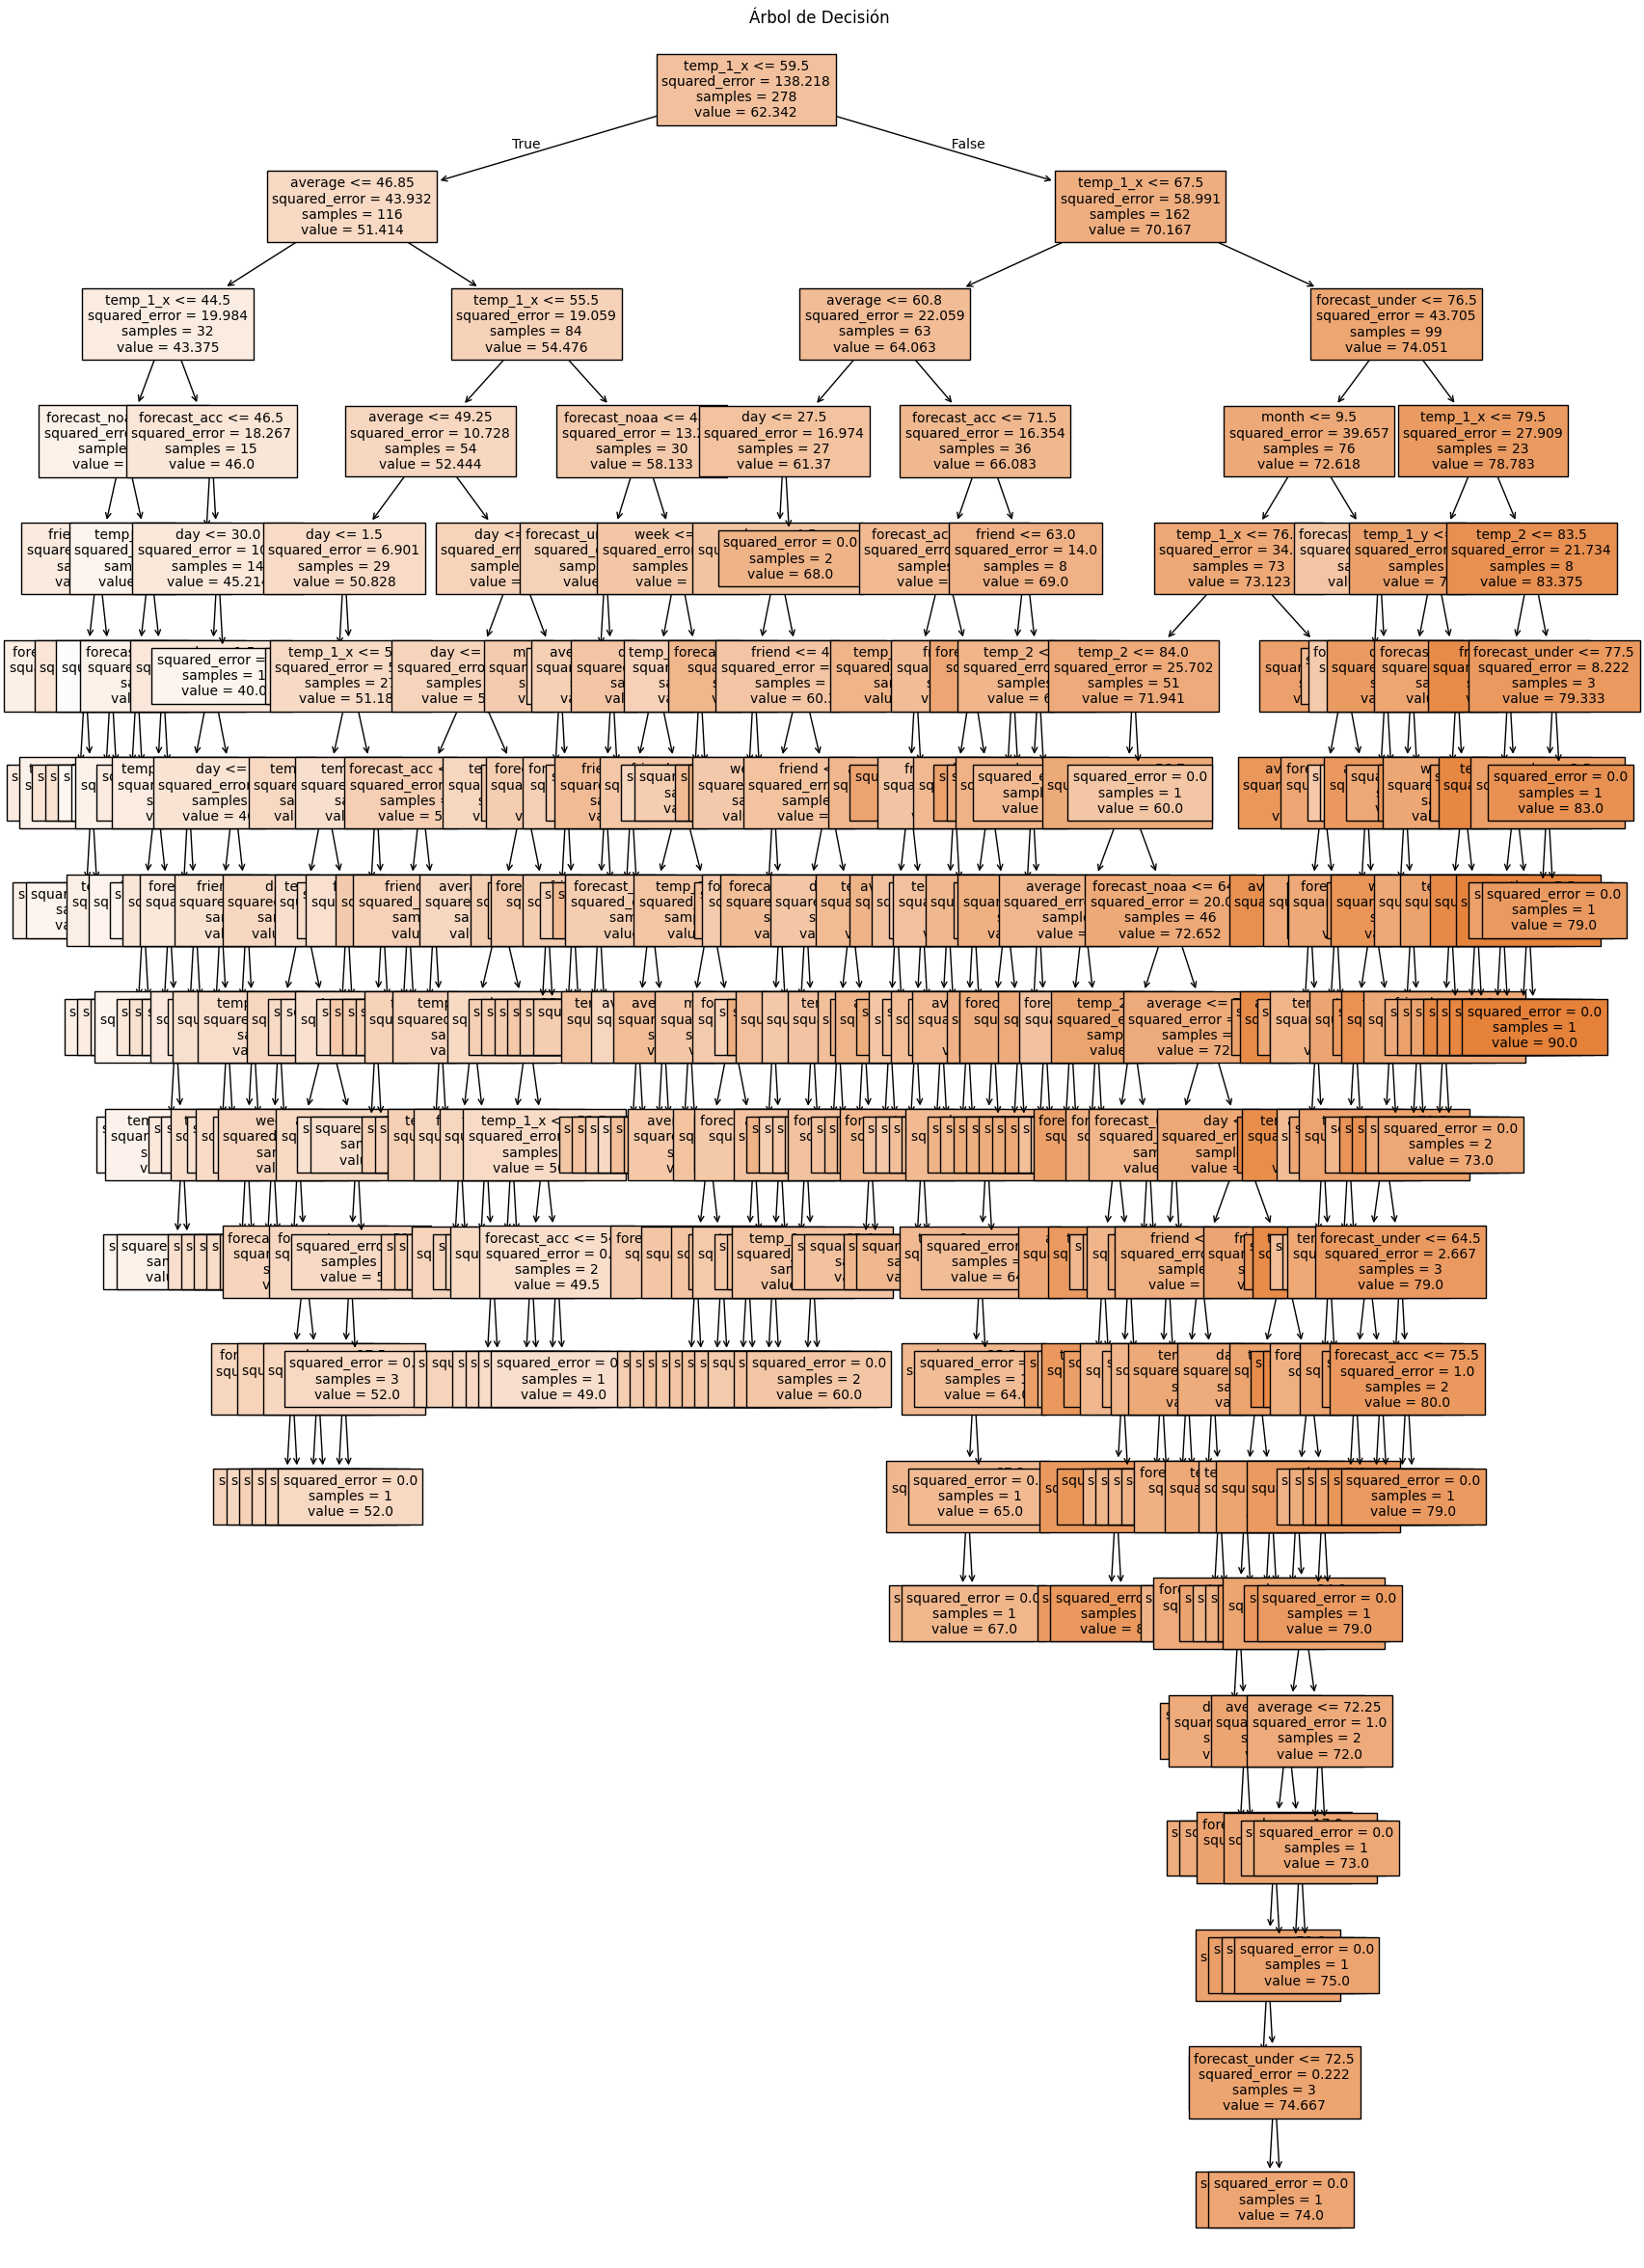

In [ ]:

plt.figure(figsize=(20, 30))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Árbol de Decisión")
plt.show()

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

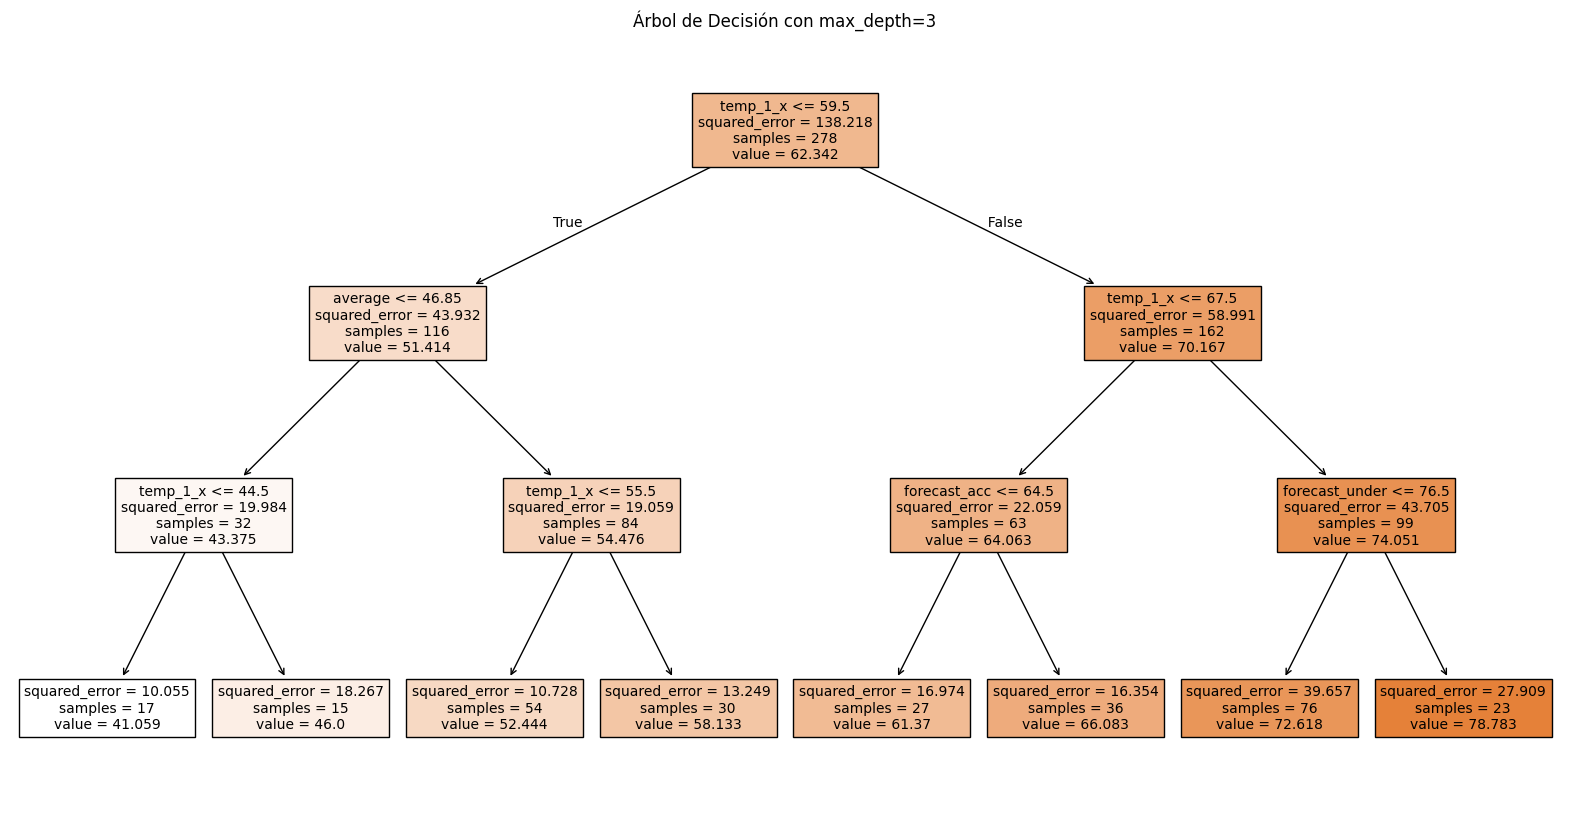

In [ ]:

model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Árbol de Decisión con max_depth=3")
plt.show()


### 8. Vuelve a evaluar tu modelo

In [ ]:

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)


mae = mean_absolute_error(y_test, y_pred)


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)


print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}%")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")


Coeficiente de Determinación (R²): 0.7561
MAE (Mean Absolute Error): 4.5567
MAPE (Mean Absolute Percentage Error): 7.1472%
MSE (Mean Squared Error): 34.1100
RMSE (Root Mean Squared Error): 5.8404


### 9. Vuelve a representar su árbol

### 10. Obten el `feature_importances` de cada variable en el último modelo

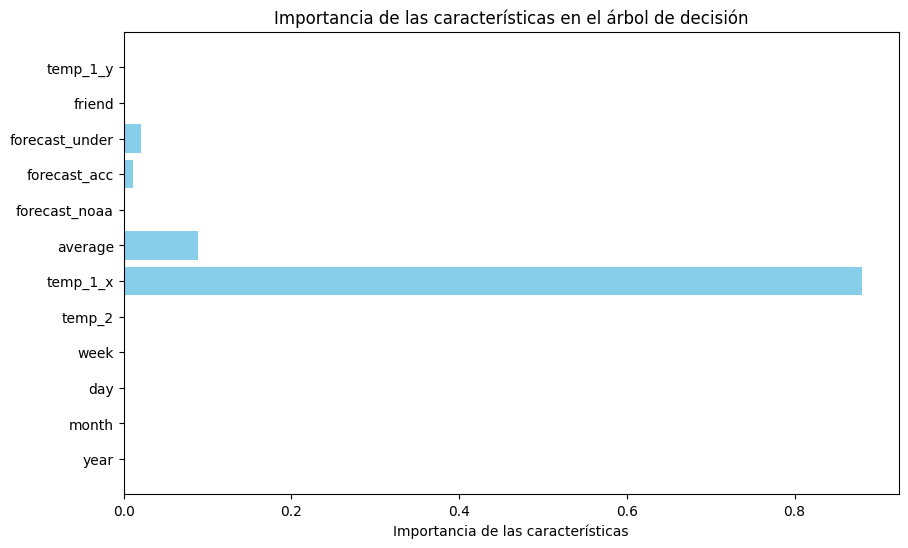

Característica: year, Importancia: 0.0000
Característica: month, Importancia: 0.0000
Característica: day, Importancia: 0.0000
Característica: week, Importancia: 0.0000
Característica: temp_2, Importancia: 0.0000
Característica: temp_1_x, Importancia: 0.8802
Característica: average, Importancia: 0.0884
Característica: forecast_noaa, Importancia: 0.0000
Característica: forecast_acc, Importancia: 0.0106
Característica: forecast_under, Importancia: 0.0208
Característica: friend, Importancia: 0.0000
Característica: temp_1_y, Importancia: 0.0000


In [ ]:
feature_importances = model.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importancia de las características')
plt.title('Importancia de las características en el árbol de decisión')
plt.show()


for feature, importance in zip(X.columns, feature_importances):
    print(f"Característica: {feature}, Importancia: {importance:.4f}")


In [43]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<AxesSubplot:>

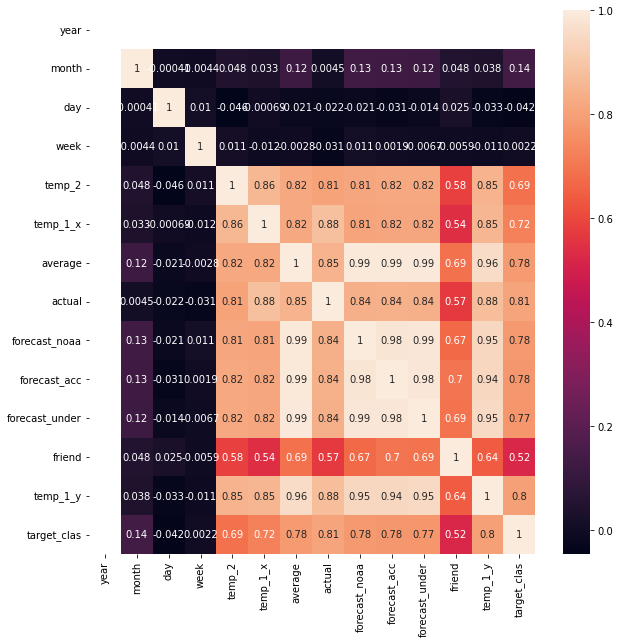

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [81]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

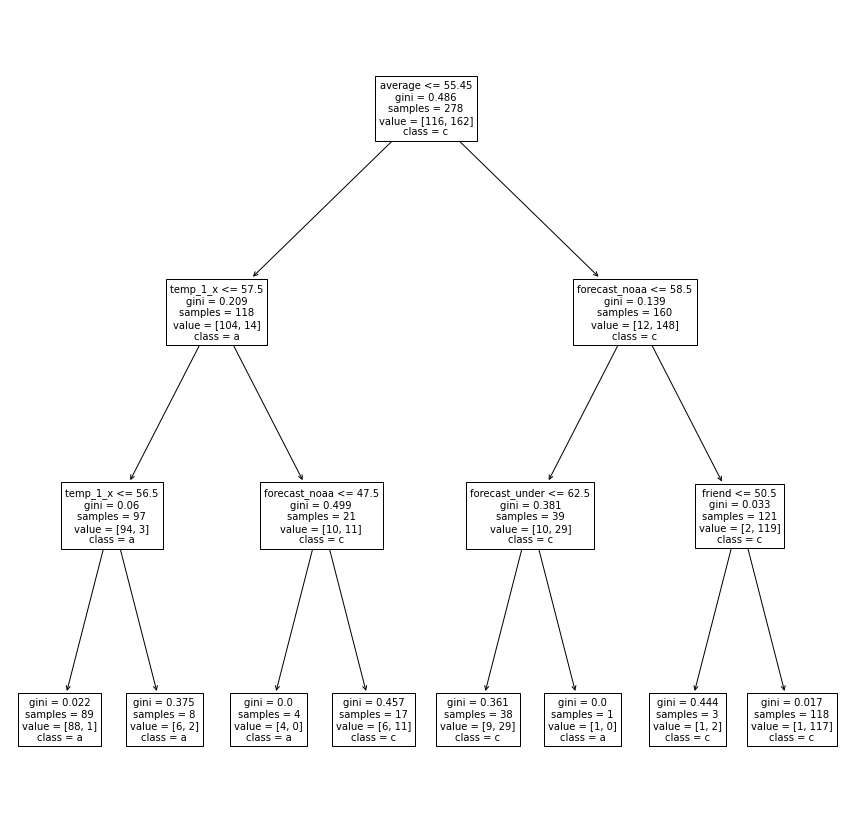

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

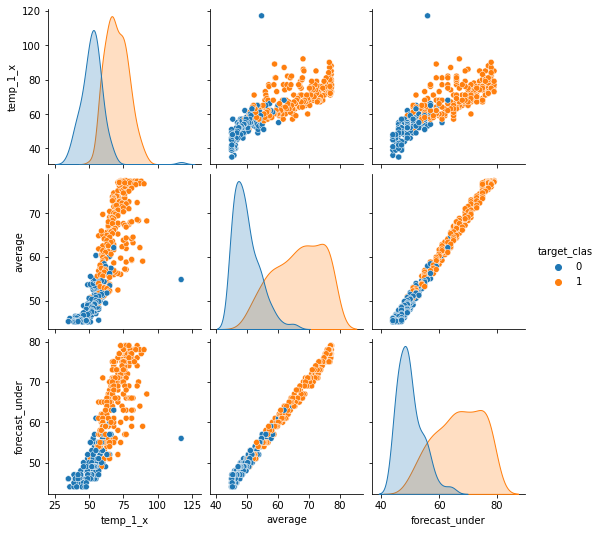

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')